## Dataanalys med data från Dataportalen 

**Data: Utsläpp till luft av växthusgaser, el och fjärrvärme, ton CO2e**

Länk: https://www.dataportal.se/sv/datasets/677_15041

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import requests

In [16]:
url = "http://api.kolada.se/v2/data/kpi/N85536/year/2015"

response = requests.get(url)

data = response.json()

print(len(data))

2


**Vad har vi för variabler?**

In [17]:
data.keys()

dict_keys(['count', 'values'])

In [18]:
data['count']

3621

In [21]:
type(data['values'])

list

**Hur ser data ut?**

In [30]:
data['values'][data['count']-1]

{'kpi': 'N85536',
 'municipality': 'G96416',
 'period': 2015,
 'values': [{'count': 5, 'gender': 'T', 'status': '', 'value': 155.53279682}]}

In [26]:
data['values'][1]['municipality']

'0001'

**Hämta data som vi behöver**

In [31]:
df_data = pd.DataFrame([data['values'][i]['municipality'] for i in range(data['count'])], columns=['Municipality'])

In [34]:
df_data['Tid'] = pd.DataFrame([data['values'][i]['period'] for i in range(data['count'])])

In [36]:
df_data['Value'] = pd.DataFrame([data['values'][i]['values'][0]['value'] for i in range(data['count'])])

In [37]:
df_data

,Municipality,Tid,Value
0,0000,2015,6.123723e+06
1,0001,2015,1.174942e+06
2,0003,2015,3.342829e+05
3,0004,2015,1.293941e+04
4,0005,2015,4.802011e+05
...,...,...,...
3616,G96180,2015,3.230689e+03
3617,G96190,2015,2.951584e+04
3618,G96274,2015,1.718574e+04
3619,G96413,2015,4.740864e+03


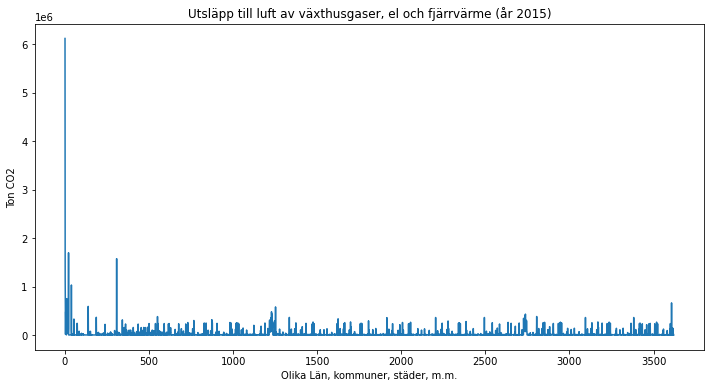

In [42]:
plt.figure(figsize=(12,6))
plt.title("Utsläpp till luft av växthusgaser, el och fjärrvärme (år 2015)")
df_data.Value.plot()
plt.ylabel("Ton CO2")
plt.xlabel("Olika Län, kommuner, städer, m.m.")
plt.show()

